# Thêm các thư viện và load bộ dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
import statsmodels.api as sm
sns.set()

In [2]:
data = pd.read_csv('car_price.csv')

In [3]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Tiền xử lý dữ liệu


## Xử lý giá trị NaN


In [4]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
data.dropna(inplace = True)
data.reset_index(inplace = True)
data = data.drop(axis = 1, columns = 'index')
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4020,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4021,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4022,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4023,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


## Tạo biến giả

In [6]:
def get_unique(data, column_name):
    print(f"{column_name}: {data[column_name].unique()}")
for i in ['Brand', 'Body', 'Engine Type', 'Registration']:
    get_unique(data, i)

Brand: ['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi']
Body: ['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']
Engine Type: ['Petrol' 'Diesel' 'Gas' 'Other']
Registration: ['yes' 'no']


In [7]:
data_with_dummies = pd.get_dummies(data[['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration', 'Year']], drop_first = True)
data_with_dummies

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,17900.0,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4021,125000.0,9,3.0,2014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4022,6500.0,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4023,8000.0,194,2.0,1985,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Tìm và loại bỏ các điểm ngoại lệ (Outliner)

In [8]:
def find_outliner(data, column_name):
    s_z_kj = 0
    z_ = data[column_name].mean()
    n = len(data[column_name])
    array = data[column_name]
    h_k = []
    for i in range(n):
        s_z_kj += pow(array[i] - z_, 2)
    for i in range(n):
        h_kj = 1/n +  pow(array[i] - z_, 2)/s_z_kj
        h_k.append(h_kj)
    outliner_point = 3 * sum(h_k) * 1/n
    h_k = np.array(h_k)
    outliner = np.where(h_k > outliner_point)
#     data.reset_index(drop = True)
#     data.drop(outliner[0], inplace = True)
    return outliner[0]

outliner = np.array([])
columns_name = data_with_dummies[['Price', 'Mileage', 'EngineV', 'Year']]
for i in columns_name:
    outliner = np.concatenate((outliner, find_outliner(data_with_dummies, i)))
data_with_dummies.drop(set(outliner.flatten()), inplace = True)
data_with_dummies.reset_index(drop = True)
# data.drop(outliner, inplace = True)  
data_with_dummies.describe()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000,3659.000000
mean,16638.725365,159.487292,2.438964,2006.993714,0.158787,0.184477,0.080077,0.116425,0.131730,0.224652,0.066138,0.097294,0.374693,0.099481,0.160973,0.147035,0.026237,0.361028,0.903526
std,14247.484543,88.696992,0.960431,5.444708,0.365527,0.387925,0.271449,0.320778,0.338243,0.417410,0.248558,0.296399,0.484110,0.299347,0.367556,0.354189,0.159860,0.480364,0.295281
min,800.000000,0.000000,0.600000,1992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.000000,95.000000,1.800000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11750.000000,157.000000,2.200000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,21000.000000,220.000000,3.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77000.000000,390.000000,9.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Xóa các cột không sử dụng

In [9]:
# delete_column = ['Brand', 'Body', 'Engine Type', 'Registration', 'Model']
# data_input = data_with_dummies.drop(axis = 1, columns = delete_column)
# data_input.reset_index(inplace = True)
# data_input.drop(columns = 'index', inplace = True)
# data_input
new_data = data_with_dummies.reset_index(drop = True)
data_with_dummies.reset_index(drop = True, inplace = True)
data_with_dummies
# data_with_dummies.drop(columns = 'level_0', inplace = True)

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,13300.0,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,14200.0,200,2.7,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,10799.0,193,1.5,2012,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654,6800.0,152,1.6,2007,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3655,11500.0,163,2.5,2008,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3656,17900.0,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3657,6500.0,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Xác định sự tương quan (Correlation)

<AxesSubplot:>

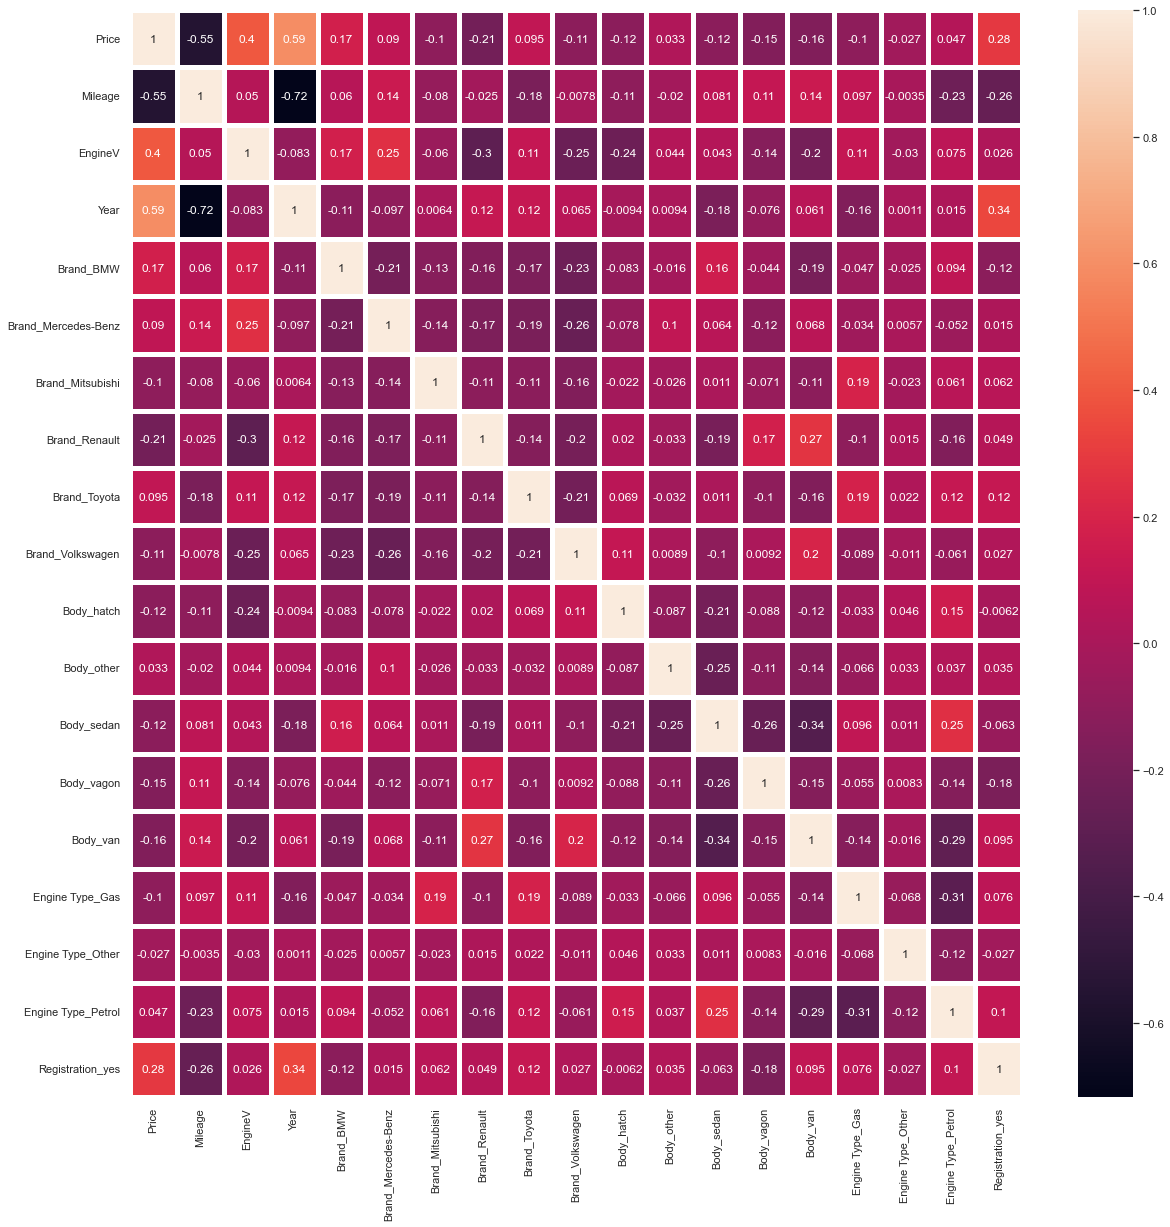

In [10]:
# problem multi-corr
fig, ax = plt.subplots(figsize=(20,20)) 
data_with_dummies.corr()
sns.heatmap(data_with_dummies.corr(), annot = True, linewidths = 5, ax = ax)

## Kiểm tra phân phối chuẩn và biểu diễn trên biểu đồ


### Kiểm tra tính phân phối chuẩn bằng biểu đồ Q-Q plot

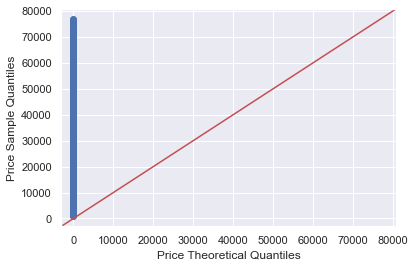

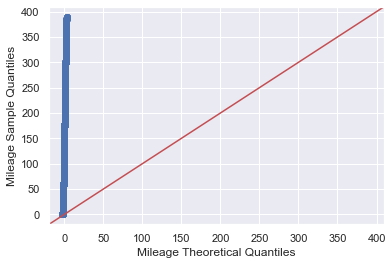

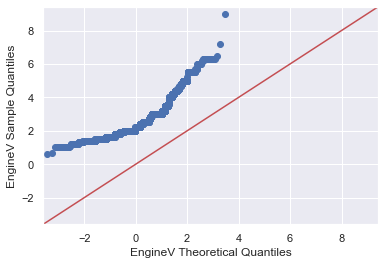

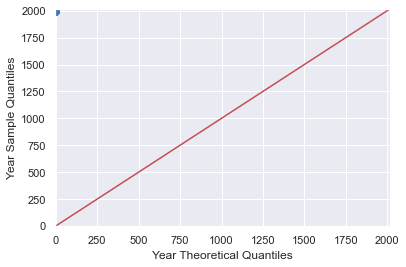

In [33]:
for i in ["Price", "Mileage", "EngineV", "Year"]:
    sm.qqplot(new_data[i], line = "45")
    plt.xlabel(f"{i} Theoretical Quantiles")
    plt.ylabel(f"{i} Sample Quantiles")

### Biểu đồ Histogram

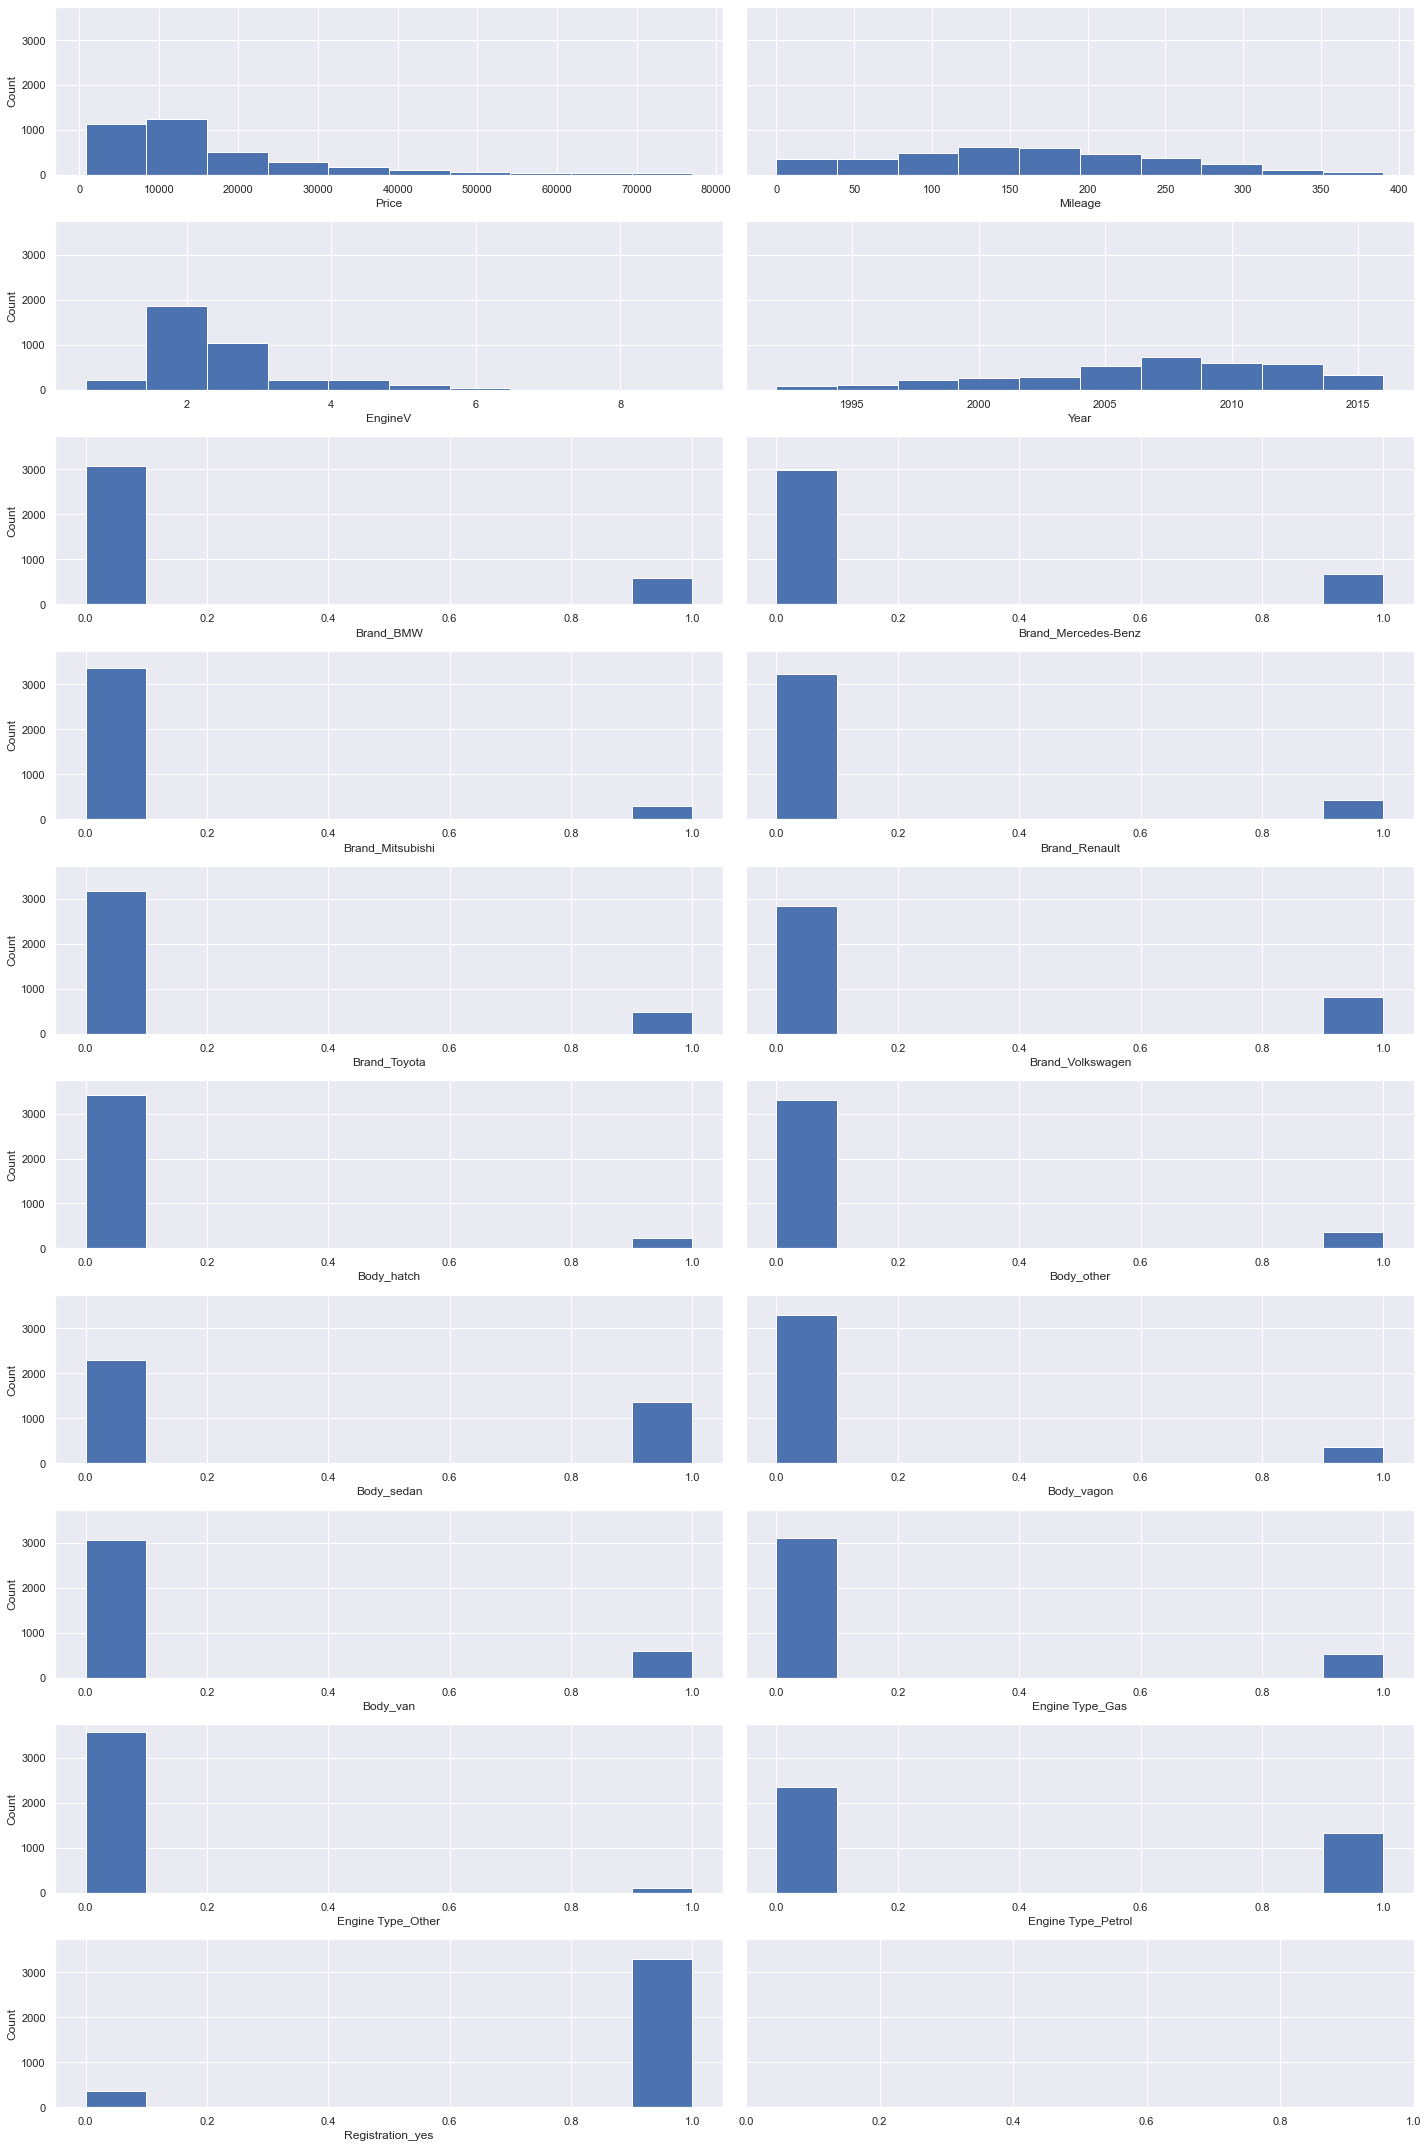

In [12]:
ncols = 2
nrows = np.ceil(len(data_with_dummies.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, sharey=True, figsize=(20,nrows*3))
row = 0
col = 0
columns_name = ['Price','Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
for idx in range(len(columns_name)):
    axs[row, col].hist(data_with_dummies[columns_name[idx]], bins = 10)
    axs[row, col].set_xlabel(columns_name[idx])
    if col == 0:
        axs[row, col].set_ylabel("Count")
    col += 1
    if col % 2 == 0:
        col = 0
        row += 1
#     axs[row,col].set_xlabel(f'{c}, corr = {corr:.3f}')
plt.tight_layout()

# Xây dựng mô hình

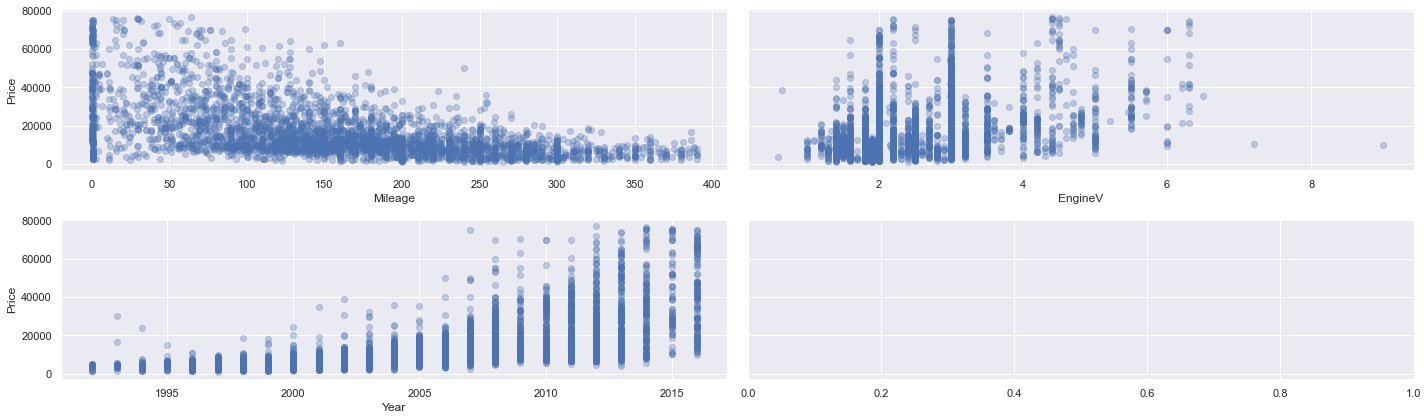

In [13]:
ncols = 2 
nrows = np.ceil(2).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, sharey=True, figsize=(20,nrows*3))
row = 0
col = 0
for idx in range(1, 4):
    axs[row, col].scatter(data_with_dummies[columns_name[idx]], data_with_dummies['Price'], alpha = 0.3)
    axs[row, col].set_xlabel(columns_name[idx])
    if col == 0:
        axs[row, col].set_ylabel("Price")
    col += 1
    if col % 2 == 0:
        col = 0
        row += 1
#     axs[row,col].set_xlabel(f'{c}, corr = {corr:.3f}')
plt.tight_layout()

## Biến đổi giá trị của biến phụ thuộc 

In [14]:
data_with_dummies['log_price'] = np.log(data_with_dummies['Price'])
# data_with_dummies.reset_index( inplace = True)
# data_with_dummies.delete('index')

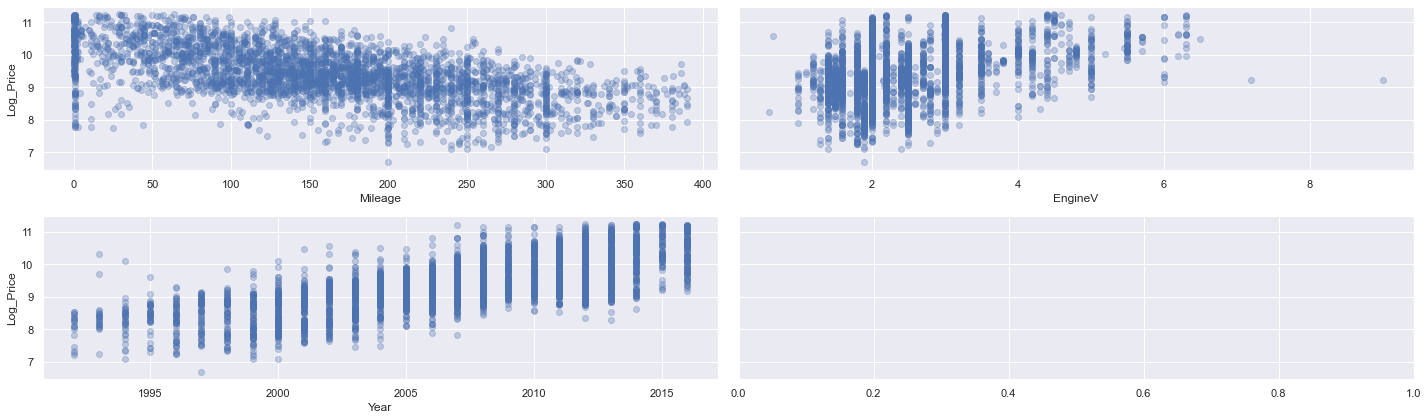

In [15]:
ncols = 2
nrows = np.ceil(2).astype(int) 
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, sharey=True, figsize=(20,nrows*3))
row = 0
col = 0
for idx in range(1, 4):
    axs[row, col].scatter(data_with_dummies[columns_name[idx]], data_with_dummies['log_price'], alpha = 0.3)
    axs[row, col].set_xlabel(columns_name[idx])
    if col == 0:
        axs[row, col].set_ylabel("Log_Price")
    col += 1
    if col % 2 == 0:
        col = 0
        row += 1
#     axs[row,col].set_xlabel(f'{c}, corr = {corr:.3f}')
plt.tight_layout()

## Chạy mô hình

In [16]:
data_with_dummies.columns

Index(['Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'log_price'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
y = data_with_dummies['log_price']
x = data_with_dummies[['Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [19]:
x_train_ac = sm.add_constant(x_train)
x_test_ac = sm.add_constant(x_test)


In [20]:
result = sm.OLS(y_train, x_train_ac).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:22:46   Log-Likelihood:                -405.67
No. Observations:                2927   AIC:                             849.3
Df Residuals:                    2908   BIC:                             963.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -159.0663      3.021    -52.654      0.000    -164.990    -153.143
Mileage                -0.0010   9.15e-05    -10.457      0.000      -0.001      -0.001
EngineV                 0.2261      0.007     33.791      0.000       0.213       0.239
Year                    0.0836      0.002     55.718      0.000       0.081       0.087
Brand_BMW               0.0769      0.021      3.623      0.000       0.035       0.118
Brand_Mercedes-Benz    -0.0192      0.021     -0.911      0.362      -0.061       0.022
Brand_Mitsubishi       -0.4862      0.026    -18.570      0.000      -0.538      -0.435
Brand_Renault          -0.6248      0.024    -25.781      0.000      -0.672      -0.577
Brand_Toyota           -0.2143      0.023     -9.470      0.000      -0.259      -0.170
Brand_Volkswagen       -0.2382      0.021    -11.419      0.000      -0.279      -0.197
Body_hatch             -0.3804      0.026    -14.725      0.000      -0.431      -0.330
Body_other             -0.2370      0.021    -11.127      0.000      -0.279      -0.195
Body_sedan             -0.3041      0.016    -18.810      0.000      -0.336      -0.272
Body_vagon             -0.3194      0.023    -13.946      0.000      -0.364      -0.275
Body_van               -0.4288      0.021    -20.215      0.000      -0.470      -0.387
Engine Type_Gas        -0.1010      0.018     -5.640      0.000      -0.136      -0.066
Engine Type_Other      -0.0731      0.033     -2.231      0.026      -0.137      -0.009
Engine Type_Petrol     -0.1019      0.014     -7.303      0.000      -0.129      -0.075
Registration_yes        0.8646      0.020     43.538      0.000       0.826       0.904
==============================================================================
Omnibus:                      288.070   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1383.977
Skew:                          -0.352   Prob(JB):                    2.97e-301
Kurtosis:                       6.294   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
bias = [result.params[i] for i in range(len(result.params))]
bias_name = result.params.index.tolist()
b_dict = {'Name': bias_name, 'B': bias}
b = pd.DataFrame(b_dict)
b

,Name,B
0,const,-159.066332
1,Mileage,-0.000957
2,EngineV,0.226093
3,Year,0.083605
4,Brand_BMW,0.076886
5,Brand_Mercedes-Benz,-0.019213
6,Brand_Mitsubishi,-0.486204
7,Brand_Renault,-0.624805
8,Brand_Toyota,-0.214279
9,Brand_Volkswagen,-0.238174


## Kiểm tra sai số 

In [22]:
y_train_predict = result.predict(x_train_ac)

In [23]:
epsilon = y_train - y_train_predict

C:\Users\daoda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

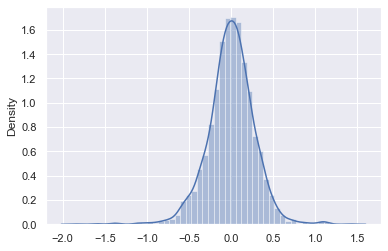

In [24]:
sns.distplot(epsilon)

In [25]:
# skewness_kurtosis(epsilon, 'Epsilon')

# Đánh giá mô hình

### Làm việc với bộ dữ liệu test

In [26]:
y_test_predict = result.predict(x_test_ac)

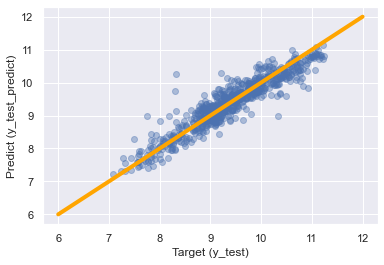

In [27]:
plt.scatter(y_test, y_test_predict, alpha = 0.4)
plt.ylabel('Predict (y_test_predict)')
plt.xlabel('Target (y_test)')
z1 = np.linspace(start = 6, stop = 12, num = 500)
z2 = np.linspace(start = 6, stop = 12, num = 500)
plt.plot(z1, z2, c = 'orange', lw = 4)
plt.show()
#plt.ylabel()

In [28]:
df_predict = pd.DataFrame(np.exp(y_test_predict), columns = ['Predict'])
df_predict['Target'] = np.exp(y_test)
df_predict = df_predict.reset_index(drop= True)
df_predict['Residuals'] = df_predict['Target'] - df_predict['Predict']
df_predict['Difference %'] = (df_predict['Target'] / df_predict['Predict']-1) * 100
df_predict

,Predict,Target,Residuals,Difference %
0,10237.049469,11100.0,862.950531,8.429680
1,6052.649389,7500.0,1447.350611,23.912679
2,9526.416797,12900.0,3373.583203,35.412929
3,18528.642394,20500.0,1971.357606,10.639515
4,9566.767448,8800.0,-766.767448,-8.014906
...,...,...,...,...
727,27807.015032,33900.0,6092.984968,21.911683
728,39101.674349,42000.0,2898.325651,7.412280
729,4251.876203,3999.0,-252.876203,-5.947403
730,10632.853253,8900.0,-1732.853253,-16.297161


In [29]:
df_predict.describe()

,Predict,Target,Residuals,Difference %
count,732.000000,732.000000,732.000000,732.000000
mean,15953.483422,16770.294891,816.811469,4.172936
std,11869.962567,14469.596924,6136.253035,31.202914
min,1357.471047,1199.000000,-24533.802249,-85.681259
25%,7643.993290,7500.000000,-1676.537277,-14.008630
50%,12658.733380,11800.000000,38.689735,0.420822
75%,21239.551014,20924.060000,2186.880208,20.566284
max,69402.309654,75555.000000,36986.771587,276.176765


In [30]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_predict.sort_values(by = ['Difference %'])


,Predict,Target,Residuals,Difference %
215,28633.80,4100.00,-24533.80,-85.68
180,17235.63,4000.00,-13235.63,-76.79
24,8039.86,2300.00,-5739.86,-71.39
254,29257.08,10000.00,-19257.08,-65.82
109,25625.16,11200.00,-14425.16,-56.29
447,9372.14,4100.00,-5272.14,-56.25
514,6823.25,3000.00,-3823.25,-56.03
76,7932.07,3600.00,-4332.07,-54.61
194,3934.29,1800.00,-2134.29,-54.25
202,15198.81,7200.00,-7998.81,-52.63
